# **Music Recommendation System**

## by **Seungeun Lee**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
- Improve users' efficiency
- Help listeners to discover artists based on their preference
- Give artists opportunities to find listeners even if they are not top ranked <br> 

**The objectives:** What is the intended goal?<br>
- Build a system that recommends best songs to customers <br> 
  - Explore the data
  - Compare recommendation systems built by different algorithms
  - Choose the best system that recommends the best song customers would like <br> 

**The key questions:** What are the key questions that need to be answered?<br>
- How many interactions are observed? 
- Which recommendation system performs the best? 
- Which songs are recommended for a certain user? 
- Which users are recommended to listen to a certain song? <br> 

**The problem formulation:** What are we trying to solve using data science? <br> 
- We are trying to provide data-based evidence on designing a system <br> 
- Data can be used to study users' preference and improve user expereince <br> 
- The performance of the recommendation system can be tested using the data 
<br> <br>

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played 
<br> <br>

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [4]:
# Importing the datasets ## Change directory!
count_df = pd.read_csv('/content/drive/MyDrive/Data_science/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Data_science/song_data.csv')

### **Understanding the data by viewing a few observations**

In [5]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [6]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [7]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [8]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:** **"count_df"** contatins 4 variables, including "user_id", "song_id", and "play_count". **"song_df"** has 5 variables including "song_id", "title", "release", "artist_name", and "year". The variables are objects except for "Unnamed: 0", "play_count", and "year" which are integers. Since both datasets have **"song_id"**, we can merge the datasets using this variable. 

In [9]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
merged_df = pd.merge(count_df, song_df, on = 'song_id')
# Drop the column 'Unnamed: 0'
final_df = merged_df.drop(columns = ['Unnamed: 0'])
final_df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,The Cove,Thicker Than Water,Jack Johnson,0
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,The Cove,Thicker Than Water,Jack Johnson,0


In [10]:
# Apply label encoding for "user_id" and "song_id"
final_df["user_id"] = final_df["user_id"].astype('category')
final_df["user_id"] = final_df["user_id"].cat.codes 

final_df["song_id"] = final_df["song_id"].astype('category')
final_df["song_id"] = final_df["song_id"].cat.codes 

final_df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,37056,153,1,The Cove,Thicker Than Water,Jack Johnson,0
2,35091,153,3,The Cove,Thicker Than Water,Jack Johnson,0
3,10905,153,1,The Cove,Thicker Than Water,Jack Johnson,0
4,18917,153,6,The Cove,Thicker Than Water,Jack Johnson,0


In [11]:
# Get the column containing the users
users = final_df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1   

In [12]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

final_df = final_df.loc[ ~ final_df.user_id.isin(remove_users)]

In [13]:
# Get the column containing the songs
songs = final_df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [14]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= final_df.loc[ ~ final_df.song_id.isin(remove_songs)]

In [15]:
df_final["play_count"].value_counts()

1      95800
2      30953
3      13863
4       7591
5       6170
       ...  
405        1
175        1
114        1
271        1
135        1
Name: play_count, Length: 130, dtype: int64

In [16]:
# Keep records with play_count more than(>) 1
df_final = df_final.drop(df_final.index[df_final['play_count'] < 2])
df_final.sort_values(by = 'play_count', ascending = False)


,user_id,song_id,play_count,title,release,artist_name,year
298372,2685,4545,405,I'll Be Your Man,The Big Come Up,The Black Keys,2002
70004,31692,614,271,You're The One,If There Was A Way,Dwight Yoakam,1990
149706,32364,97,215,Harder Better Faster Stronger,Discovery,Daft Punk,2007
914513,2403,5399,206,Strut (1993 Digital Remaster),The World Of Sheena Easton - The Singles,Sheena Easton,0
100322,62759,7416,194,Revelry,Only By The Night,Kings Of Leon,2008
...,...,...,...,...,...,...,...
434967,9190,5169,2,White Winter Hymnal,White Winter Hymnal,Fleet Foxes,2008
435006,5077,5169,2,White Winter Hymnal,White Winter Hymnal,Fleet Foxes,2008
435040,68733,5169,2,White Winter Hymnal,White Winter Hymnal,Fleet Foxes,2008
435063,17328,5169,2,White Winter Hymnal,White Winter Hymnal,Fleet Foxes,2008


In [17]:
# Check the shape of the data
df_final.shape

(74414, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [18]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3442

Total number of unique song id

In [19]:
# Display total number of unique song_id
df_final['song_id'].nunique()

695

Total number of unique artists

In [20]:
# Display total number of unique artists 
df_final['artist_name'].nunique()

258

#### **Observations and Insights:** I dropped song **that are played only once**. To build a recommendation system that is based on a large database, I kept the other songs. The final data have **3,442 unique users** and **695** unique songs, while including **258 unique artists**. It indicates that **each artist has more than two songs**, on average. 


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [21]:
df_final['song_id'].value_counts()

8582    1076
352      773
2220     699
6293     696
5531     643
        ... 
7583      28
5918      27
2342      26
8282      24
8615      16
Name: song_id, Length: 695, dtype: int64

Most interacted users

In [22]:
df_final['user_id'].value_counts()

3237     237
62759    186
31704    179
37049    174
15733    172
        ... 
4590       1
19751      1
16660      1
48193      1
42141      1
Name: user_id, Length: 3442, dtype: int64

#### **Observations and Insights:** The most played song is **8582**, which was **played 1,076 times**. User **3237** is the most active user who played songs 237 times in total. 


Songs played in a year

In [23]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,4098
2007,7021
2008,8527
2009,9746
2010,2911


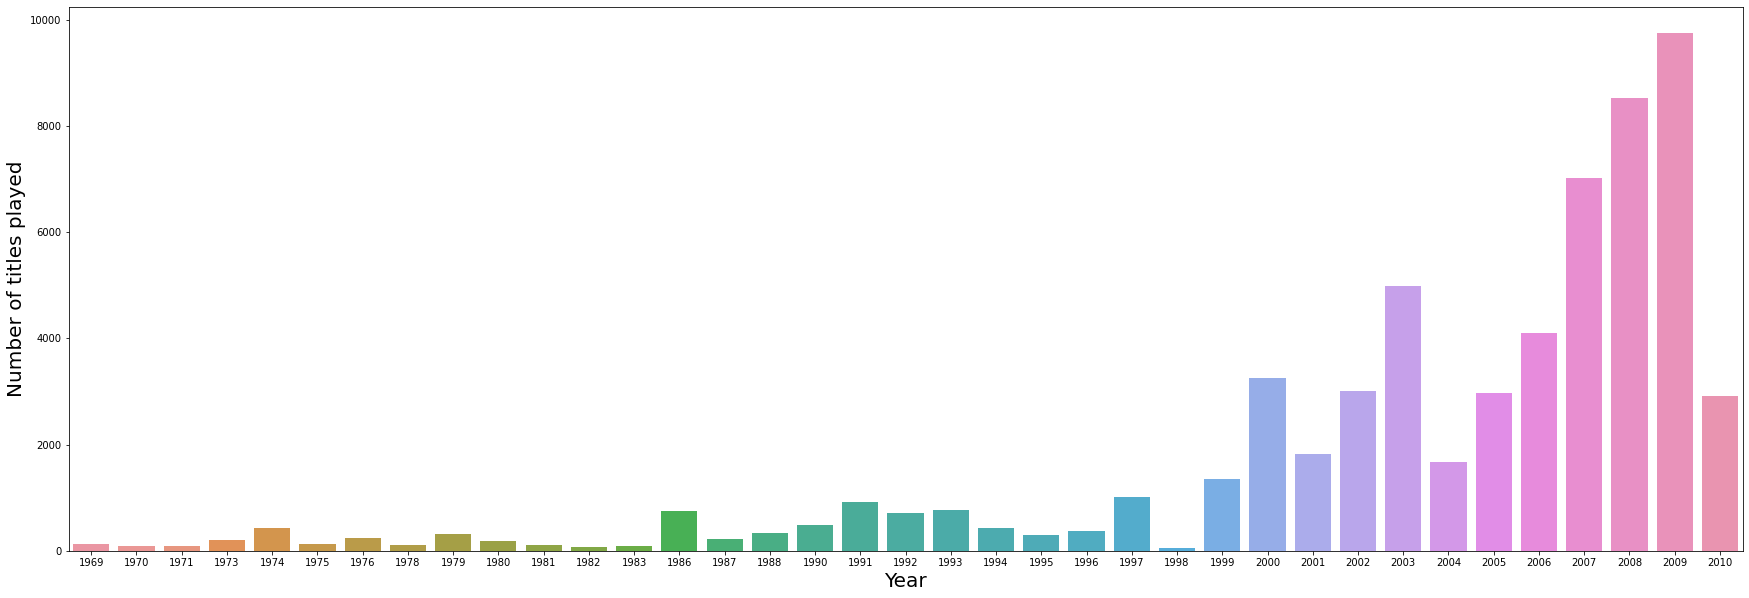

In [24]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('Number of titles played', size = 20) 
plt.xlabel('Year', size = 20)
# Show the plot
plt.show()

In [25]:
# Load the dataset you have saved at the end of milestone 1
df_final = pd.read_csv('/content/drive/MyDrive/Data_science/final.csv')
df_final.head()

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,381,3919,736,2,Stronger,Graduation,Kanye West,2007
1,382,3919,736,2,Stronger,Graduation,Kanye West,2007
2,409,51414,736,2,Stronger,Graduation,Kanye West,2007
3,410,51414,736,2,Stronger,Graduation,Kanye West,2007
4,451,72805,736,3,Stronger,Graduation,Kanye West,2007


In [26]:
song_all = df_final.groupby('song_id').count().sort_values('user_id', ascending = False)['title'][0:30] 
top_songs_count = pd.DataFrame(song_all) 
top_songs_count.drop(top_songs_count.index[0], inplace = True)  

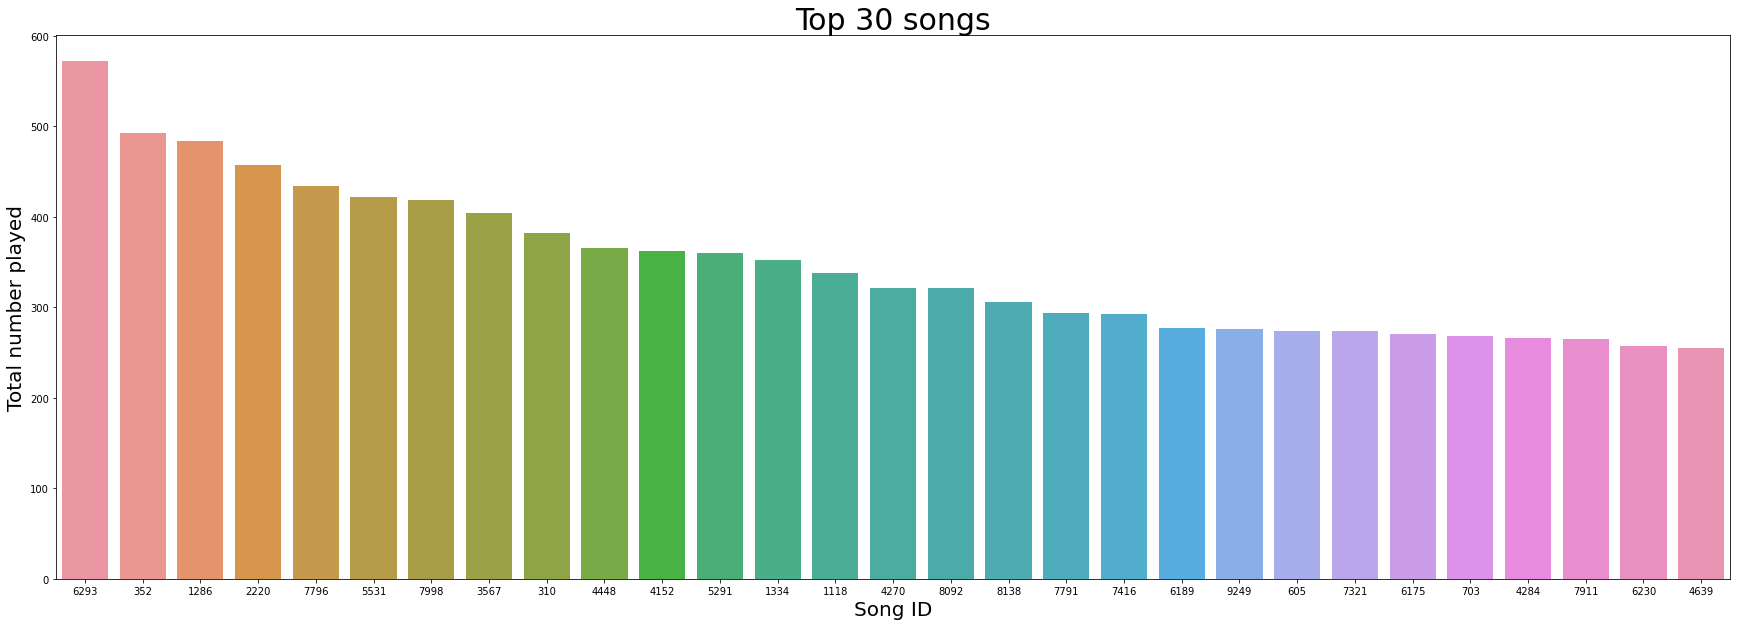

In [27]:
plt.figure(figsize = (30, 10))

sns.barplot(x = top_songs_count.index,
            y = top_songs_count['title'],
            data =  top_songs_count,
            order = top_songs_count.sort_values('title', ascending = False).index,
            estimator = np.median)

plt.ylabel('Total number played', size = 20)
plt.xlabel('Song ID', size = 20)

plt.title('Top 30 songs', size = 30)

plt.show()

**The final dataset includes songs that were played by users more than once but less than 5 times. This excludes the case where one user repeatedly played one song, and the case where a user accidently or randomly played a song.**

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [28]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']       

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').count()['play_count'] 

In [29]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,2.728155,103
22,2.805556,36
50,2.743590,39
52,2.646766,201
62,2.914894,47


In [30]:
final_play['play_freq'].value_counts()

52     20
46     20
51     18
36     16
54     16
       ..
236     1
145     1
362     1
105     1
96      1
Name: play_freq, Length: 187, dtype: int64

Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [31]:
# Build the function to find top n songs
def top_n_songs(data, n, min_interaction = 10): 

    # Finding song with minumum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]

    # Sorting values w.r.t. play counts 
    recommendations = recommendations.sort_values(by='avg_count', ascending = False)

    return recommendations.index[:n]

In [32]:
# Recommend top 10 songs using the function defined above 
list(top_n_songs(final_play, 10, 10))

[7224, 8324, 6450, 657, 5566, 9942, 8483, 6084, 7866, 7889]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [33]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 27.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633983 sha256=92caaa1743cd61fdd37a1c726a37d1b656aea8135af58bf1d036923de9fbeb7f
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [34]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

In [35]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

In [36]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale = (0, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

In [37]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Use random_state = 1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

RMSE: 1.0364
Precision:  1.0
Recall:  0.996
F_1 score:  0.998


**Observations and Insights:**  We are getting a **recall of 0.996**, which means out of all the relevant products 99.6% are recommended. Also, we are getting **a precision of 1**, which means out of all the recommended products **100%** are relevant. **F_1 score of the baseline model is 0.998**, which indicates that **mostly recommended products are relevant and relevant products are well recommended.**

In [38]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict("6958", "1671", r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 2.81   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=2.809679622147613, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [39]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict("6958", "3232", verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 2.81   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=2.809679622147613, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:** The above output shows that **the actual rating for the user "6958" and song "1671" pair is 2**, and **the predicted rating is 2.81** by this **user-user-similarity-based baseline model**. <br> 
Also, the **predicted rating for user "6958" of song "3232"** is around **2.81** based on this **user-user similarity-based baseline model**.

Now, let's try to tune the model and see if we can improve the model performance.

In [40]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9577398948229444
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [41]:
# Train the best model found in above gridsearch
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0196
Precision:  1.0
Recall:  0.996
F_1 score:  0.998


**Observations and Insights:** We can observe that after tuning hyperparameters, **F_1 score of the tuned model is 0.998**, which is the same as the baseline model. It is hard to say that the model is not improved, as the baseline model already has a very high F_1 score. **The RMSE of the model (1.02) slightly decreased than in the baseline model (1.04), showing some improvement.**

In [42]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict("6958","1671",r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.81   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=2.809679622147613, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [43]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict("6958","3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 2.81   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=2.809679622147613, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:** The estimated play count for the user with id "6958" is **2.81** for song with id "1671", while the actual play count is 2. The estimated play count for song "3232" is also **2.81**, **which is the same estimation as in the baseline model**.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [44]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[4, 6, 9, 10, 11]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [45]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the business ids which user_id has not interacted yet
    for song_id in non_interacted_products:
        
        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, song_id).est
        
        # Appending the predicted ratings
        recommendations.append((song_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [46]:
df_final.head()

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,381,3919,736,2,Stronger,Graduation,Kanye West,2007
1,382,3919,736,2,Stronger,Graduation,Kanye West,2007
2,409,51414,736,2,Stronger,Graduation,Kanye West,2007
3,410,51414,736,2,Stronger,Graduation,Kanye West,2007
4,451,72805,736,3,Stronger,Graduation,Kanye West,2007


In [47]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
id_user = 6958
recommendations = get_recommendations(df_final, id_user , 5, sim_user_user_optimized)

In [48]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_playcounts'])

,song_id,predicted_playcounts
0,1348,3.206106
1,3380,2.900000
2,7738,2.888889
3,21,2.809680
4,22,2.809680


**Observations and Insights:** Based on the model, songs with ids **"1348", "3380". "7738" ,"21", and "22"** are recommended to the user "6958". The predicted play counts for these songs are **all close to 3**.

### Correcting the play_counts and Ranking the above songs

In [49]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings',ascending = False)
  
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [50]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,1348,208,3.206106,3.136769
2,3380,52,2.900000,2.761325
3,7738,52,2.888889,2.750214
1,21,103,2.809680,2.711147
4,22,36,2.809680,2.643013


**Observations and Insights:** Although the corrected_ratings are lower than the predicted-ratings, **the ranking of the songs did not change**. 

### Item Item Similarity-based collaborative filtering recommendation systems 

In [51]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0212
Precision:  1.0
Recall:  0.996
F_1 score:  0.998


**Observations and Insights:** The baseline model of item-item similarity-based collaborative filtering recommendation systems is giving a **F_1 score of 0.998** that is as high as the user-user based model. **The recall and precision are 0.996 and 1, respectively, that are also the same as the user-user based model**.

In [52]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user 
sim_item_item.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.81   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=2.809679622147613, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [53]:
df_final[df_final.song_id == 1671].user_id.unique()

array([ 6958, 54866, 23516, 70987, 30305, 55566,  1035, 52134, 23705,
       60129,  7670, 25351, 35160, 23790, 41878, 53691, 43177, 72448,
       60644, 60518, 34410, 71481, 61513, 33403, 60923, 23148, 69722,
        1602, 37727, 61794, 48175, 72397, 60215, 45401, 10267, 43539,
       67874, 64985, 17932, 16076, 17050,  9193, 51599, 59782, 61007,
       50687, 47105, 10807])

In [54]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict("10632", "1671", verbose = True)

user: 10632      item: 1671       r_ui = None   est = 2.81   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='10632', iid='1671', r_ui=None, est=2.809679622147613, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:** The above output shows that **the actual play count for the user-song pair "6958"-"1671" is 2, and the predicted count is 2.81** by this user-user-similarity-based baseline model. **The predicted play count is also 2.81** for the user "10632" who has not listened to the song "1671".


In [55]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse']) 

0.9765182195453118
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [56]:
# Apply the best modle found in the grid search
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 3, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0269
Precision:  1.0
Recall:  0.996
F_1 score:  0.998


**Observations and Insights:** We can observethat after tuning hyperparameters, **F_1 score of the tuned model is 0.998, which is better than the baseline model.** Along with this, both **precision and recall are the same** as compared to the model before hyperparameter tuning. The only difference is that **the RMSE (1.0269) is higher than before (1.0212)**. Hence, we cannot say that the model performance has improved after hyperparameter tuning. 

In [57]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.81   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=2.809679622147613, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [58]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 2.81   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=2.809679622147613, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:** The estimated play count for the user with id "6958" is **2.81 for both songs "1671" and "3232", which is the same as the estimated play count using the baseline model.** 

In [59]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[4, 6, 9, 10, 11]

In [60]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item)

In [61]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,52,5
1,194,5
2,337,5
3,396,5
4,657,5


In [62]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,52,201,5,4.929465
1,396,163,5,4.921674
2,657,68,5,4.878732
3,194,64,5,4.875000
4,337,24,5,4.795876


**Observations and Insights:** The tuned model recommends "52", "396", "657", "194", and "337", **which are different from recommendations using the baseline model.** The predicted play counts are **all 5.** After correcting the ratings, the ranking of the songs does not change. **The corrected ratings are generally lower than the originally predicted ratings, but still quite close to 5.**  

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [63]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 0.9589
Precision:  1.0
Recall:  0.996
F_1 score:  0.998


In [64]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.81   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=2.809679622147613, details={'was_impossible': False})

In [65]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict("6959", "3232", verbose = True)

user: 6959       item: 3232       r_ui = None   est = 2.81   {'was_impossible': False}


Prediction(uid='6959', iid='3232', r_ui=None, est=2.809679622147613, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [66]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

0.9589516638856149
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


In [67]:
# Build the optimized SVD model using optimal hyperparameter search
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 0.9636
Precision:  1.0
Recall:  0.996
F_1 score:  0.998


**Observations and Insights:** The **F_1 score for the matix factorization model on the test set (0.998) is still very high as in the other models.** The **precision and recall** are all the same. The only difference is that **the RMSE (0.9636) is higher than the RMSE in the baseline model (0.9589)**, implying that the model is not improved after tuning hyperparameters. Note that **the models are improved compared to the user-user-similarity-based model and item-item-similarity-based model, showing the RMSE lower than 1.**   

In [68]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict('6958','1671', r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.81   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=2.809679622147613, details={'was_impossible': False})

In [69]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict('6958','3232', verbose = True)

user: 6958       item: 3232       r_ui = None   est = 2.81   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=2.809679622147613, details={'was_impossible': False})

**Observations and Insights:** The output shows that **the predicted play count of the user "6958" is 2.81 for both songs with ids "1671" and "3232", which is the same prediction as compared to the baseline model.**

In [70]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd)

In [71]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,7224,69,4.662476,4.542090
2,6450,55,4.302386,4.167546
3,8324,46,4.164867,4.017425
1,657,68,3.831368,3.710100
4,6084,32,3.858450,3.681673


**Observations and Insights:** The model-based recommendation system recommends **"7224", "6450", "8324", "6084" and "657"**. **The list is different from the songs that were recommended using the user-user-similarity-based model and the item-item-similarity-based model.** A song with **id "657" is also recommended by the item-item-similarity-based recommendation system.** The ranking is still the same after correcting the ratings, and the overall ratings become lower.  

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [72]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0322
Precision:  0.998
Recall:  0.987
F_1 score:  0.992


In [73]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.22   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=2.2205084840418743, details={'was_impossible': False})

In [74]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 2.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=2.56089309942649, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [75]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gives the best RMSE score
print(gs.best_params['rmse'])

1.0459873696894058
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


In [76]:
# Train the tuned Coclustering algorithm
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 6, n_epochs = 30, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0636
Precision:  0.998
Recall:  0.986
F_1 score:  0.992


**Observations and Insights:** The clustering-based model has **F_1 scores of 0.992** before and after the hyperparameter tuning. **The RMSEs are 1.0322 and 1.0636**, respectively, for the baseline and optimized models. It means that the optimization did not improve the baseline model that much. 

In [77]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.28   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=2.278480052508896, details={'was_impossible': False})

In [78]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True) 

user: 6958       item: 3232       r_ui = None   est = 2.78   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=2.7751192442608232, details={'was_impossible': False})

**Observations and Insights:** The output shows that the user "6958"'s **predicted play count for song "1671" is 2.28, while the actual play count is 2.** The predicted play count for song "3232" is **2.78, which is higher than the predicted play count from the baseline model (2.56).** 

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [79]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based baseline moel" algorithm
# Since the model is not improved after tuning, I would rather use the baseline model 

clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_baseline)

### Correcting the play_count and Ranking the above songs

In [80]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,8324,46,4.767803,4.620361
0,7224,69,4.585893,4.465507
1,6450,55,4.546375,4.411535
2,7866,52,4.251138,4.112463
4,2054,29,4.232089,4.046394


**Observations and Insights:** We used "Co-clustering based baseline model" to recommend songs to users because the tuning does not improve the performance of the model. **The system recommends "8324", "7224", "6450", "7866", and "2054".** The list is different from the previous models, but **"8324", "7224", and "6450" were also recommended by the model-based system**.

### **Content Based Recommendation Systems**

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [81]:
df_small = df_final

In [82]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['artist_name'] + ' ' + df_small['release'] + ' ' + df_small['title'] 

df_small.head()

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year,text
0,381,3919,736,2,Stronger,Graduation,Kanye West,2007,Kanye West Graduation Stronger
1,382,3919,736,2,Stronger,Graduation,Kanye West,2007,Kanye West Graduation Stronger
2,409,51414,736,2,Stronger,Graduation,Kanye West,2007,Kanye West Graduation Stronger
3,410,51414,736,2,Stronger,Graduation,Kanye West,2007,Kanye West Graduation Stronger
4,451,72805,736,3,Stronger,Graduation,Kanye West,2007,Kanye West Graduation Stronger


In [83]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id','song_id','play_count','title','text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Stronger,3919,736,2,Kanye West Graduation Stronger
Constellations,40549,750,2,Jack Johnson In Between Dreams Constellations
Learn To Fly,75901,1188,2,Foo Fighters There Is Nothing Left To Lose Lea...
Paper Gangsta,33280,1536,2,Lady GaGa The Fame Monster Paper Gangsta
Sehr kosmisch,56576,2220,2,Harmonia Musik von Harmonia Sehr kosmisch


In [84]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

0          Stronger
1    Constellations
2      Learn To Fly
3     Paper Gangsta
4     Sehr kosmisch
Name: title, dtype: object

In [85]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


We will create a **function to pre-process the text data:**

In [86]:
# Function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [87]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [88]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.65559925,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.65559925, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [89]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [90]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[559, 431, 312, 22, 469, 400, 626, 478, 477, 466]


['Big Me',
 'Everlong',
 'The Pretender',
 'Just Lose It',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Campus (Album)',
 'Last Day Of Our Love',
 'Lump Sum']

In [91]:
df_small[(df_small.index == "Learn To Fly") |(df_small.index == "Big Me") | (df_small.index == "Everlong") 
| (df_small.index == "The Pretender")| (df_small.index == "Just Lose It") | (df_small.index == "Nothing Better (Album)")
| (df_small.index == "From Left To Right")| (df_small.index == "Lifespan Of A Fly")| (df_small.index == "Campus (Album)")
| (df_small.index == "Last Day Of Our Love")| (df_small.index == "Lump Sum")] 

,user_id,song_id,play_count,text
title,,,,
Learn To Fly,75901,1188,2,Foo Fighters There Is Nothing Left To Lose Lea...
Just Lose It,587,8268,2,Eminem Curtain Call Just Lose It
The Pretender,49549,6525,2,Foo Fighters Echoes_ Silence_ Patience & Grace...
From Left To Right,6901,4739,2,Boom Bip Corymb From Left To Right
Everlong,41101,9249,2,Foo Fighters The Colour And The Shape (Special...
Lump Sum,75901,7057,2,Bon Iver For Emma_ Forever Ago Lump Sum
Nothing Better (Album),45386,1994,5,Postal Service Give Up Nothing Better (Album)
Last Day Of Our Love,72044,731,2,the bird and the bee One Too Many Hearts Last ...
Campus (Album),56230,1044,3,Vampire Weekend Vampire Weekend Campus (Album)


In [92]:
df_recommended = df_final[["title","artist_name"]]
df_recommended[(df_recommended.title == "Learn To Fly") |(df_recommended.title == "Big Me") | (df_recommended.title == "Everlong") 
| (df_recommended.title == "The Pretender")| (df_recommended.title == "Just Lose It") | (df_recommended.title == "Nothing Better (Album)")
| (df_recommended.title == "From Left To Right")| (df_recommended.title == "Lifespan Of A Fly")| (df_recommended.title == "Campus (Album)")
| (df_recommended.title == "Last Day Of Our Love")| (df_recommended.title == "Lump Sum")].drop_duplicates("title")

,title,artist_name
190,Learn To Fly,Foo Fighters
2836,Just Lose It,Eminem
31345,The Pretender,Foo Fighters
41511,From Left To Right,Boom Bip
43633,Everlong,Foo Fighters
45880,Lump Sum,Bon Iver
46145,Nothing Better (Album),Postal Service
46729,Last Day Of Our Love,the bird and the bee
46775,Campus (Album),Vampire Weekend
51303,Big Me,Foo Fighters


**Observations and Insights:** Based on the recommended songs and information, the model recommends **three songs from "Foo Fighters" who is the artist of "Learn to Fly".** The model also recommends two songs from "the bird and the bee". Hence, the resulting recommendation system is working well. 

## **Conclusion and Recommendations:** 

- **Refined Insights -** What are the most meaningful insights from the data relevant to the problem? <br> 
  - The data is filtered so that it contains records of played more than once but less than 5 times 
    - This is to exclude the case where one user played a particular song repeatedly and the case where users accidentally played a song 
  - The most meaningful insights from the data is that the number of played is well distributed across multiple songs 
    - Song "4639" was played more than 200 times as a top 30 song, while song "6293" played over 500 times. 

- **Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
  - Based on F_1 score, the performance of cluster-based model (0.992) is worse than other models (0.998), although it is still very high
  - Based on RMSE of the model, the model-based baseline model (0.959) performs the best
  - Other models have RMSEs larger than 1
  - "Predicted play count" shows the prediction of play count for song 1671 whose actual play count is 2
  - Based on F_1 scores, the cluster-based model's performance was the worst, but the model's predictions of play count (2.22 and 2.28) are the closest to 2 
  - The list on the left table shows recommended songs similar to "Learn To Fly" by "Foo Fighters", using content-based recommendation system
  - We can say that the system works well, as it recommends three of Foo Fighters' songs

- **Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?
  - Rank-based, similarity-based, model-based, and cluster-based models  all have high F_1 scores that are larger than 0.99 
  - Content-based model recommends songs that have similar properties to the target song 
  - Since the model-based baseline recommendation system performs the best with the lowest RMSE, I choose it as a final model
  - When we want to see recommendations that are similar to a particular song, I will use content-based model to provide a list of songs
